In [1]:
import netCDF4 as nc
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read multiple files (wildcard)
bath = nc.Dataset('../data/bathymetry.nc','r')

# read multiple files (file list)
# vn = nc.MFDataset(['data_y1997','data_y1998','data_y1999'])

# Variable from multiple files.
# airv = vn.variables['ts']

In [1]:
for i in bath.variables:
    print (i)

NameError: name 'bath' is not defined

In [4]:
start = (0, 0)
end = (1000, 1000)
h = bath.variables['elevation'][start[0]:end[0], start[1]:end[1]] # crashes on unlimited size! limit to small
lat = bath.variables['lat'][:]
lon = bath.variables['lon'][:]
print(lon.shape, lat.shape, bath.variables['elevation'].shape)

(43200,) (21600,) (21600, 43200)


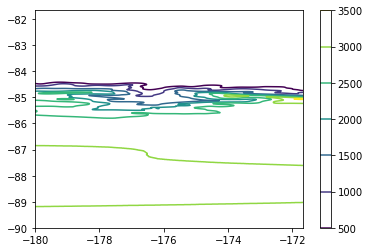

In [5]:
x=lon[start[0]:end[0]]#np.linspace(0, h.shape[0]-1, h.shape[0])
y=lat[start[1]:end[1]]#np.linspace(0, h.shape[1]-1, h.shape[1])
xx,yy=np.meshgrid(x, y)
fig=plt.figure()
ax = fig.add_subplot(111)#,projection = '3d')
plt.contour(xx, yy, h)#, rstride=20, cstride=20)
plt.colorbar()

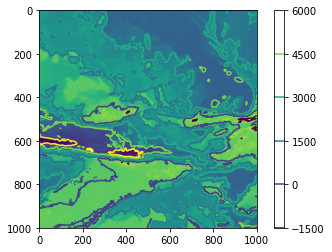

In [6]:
cbs = (12500, 12000)# lat, lon indexes
cbe = (13500, 13000) # carribean
carribean = bath.variables['elevation'][cbs[0]:cbe[0], cbs[1]:cbe[1]]
x=lon[cbs[1]:cbe[1]]#np.linspace(0, h.shape[0]-1, h.shape[0])
y=lat[cbs[0]:cbe[0]]#np.linspace(0, h.shape[1]-1, h.shape[1])
xx,yy=np.meshgrid(x, y)
fig=plt.figure()
ax = fig.add_subplot(111)#,projection = '3d')
cont = plt.imshow(carribean)#, rstride=20, cstride=20)
plt.contour(-carribean)
cb = plt.colorbar()


In [7]:
print(lat[12500], lat[13500]) # lat 12500, 13500
print(lon[12000], lon[13000]) # lon 12000, 13000

14.170833333333334 22.504166666666666
-79.99583333333334 -71.66250000000001


In [8]:
print(lat[12600], lat[14400])
print(lon[9600], lon[13200])
np.argmin(lon-70)

15.004166666666666 30.004166666666666
-99.99583333333334 -69.99583333333334


0

In [9]:
def lattoin(l):
    return np.argmin(np.abs(lat-l))
def lontoin(l):
    return np.argmin(np.abs(lon-l))

In [10]:
lattoin(3.316), lontoin(95.854) # lat, lon of indonesian tsunami source

(11197, 33102)

In [8]:
ins = (11000, 33000)# lat, lon indexes
ine = (11500, 33250) # carribean
indo[::-1] = bath.variables['elevation'][ins[0]:ine[0], ins[1]:ine[1]]
plt.figure()
plt.imshow(indo)
plt.contour(indo, levels=1)
# plt.colorbar()

NameError: name 'indo' is not defined

In [14]:
print(np.argmin(np.abs(lat+2)), np.argmin(np.abs(lon-118)))
np.argmin(np.abs(lat-2)), np.argmin(np.abs(lon-122))

10560 35760


(11040, 36240)

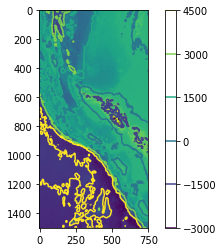

In [13]:

indonesia = bath.variables['elevation'][10500:12000, 32750:33500]
# x=lon[cbs[1]:cbe[1]]#np.linspace(0, h.shape[0]-1, h.shape[0])
# y=lat[cbs[0]:cbe[0]]#np.linspace(0, h.shape[1]-1, h.shape[1])
# xx,yy=np.meshgrid(x, y)
fig=plt.figure()
ax = fig.add_subplot(111)#,projection = '3d')
cont = plt.imshow(indonesia[::-1])#, rstride=20, cstride=20)
plt.contour(-indonesia[::-1])
cb = plt.colorbar()
